<a href="https://colab.research.google.com/github/VinZCodz/machine-learning-works/blob/main/multi_variate_linear_regression/multi_variate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets predict in a Multi-variable circumstances

Note! Please upload the files from the repo to files section in colab for some usefull libraries.



## Basic Math (Vector and Scalar)

In [ ]:
import numpy as np

a=np.array([1, 2, 3, 4])
b=np.array([8, 9, 1, 2])

c=a.dot(b)
print(f'Dot product of vector a with only 1 sample and 4 features DOT vector b with similiar shape and features= {c}')

a_mn=np.arange(6).reshape(2, 3)
print(f'a_mn=\n{a_mn}')


## Introduction to Multi Variate version.

Prediction in a linear setting where there are more than one influencing variables.

Represted by f_x=w0*x0 + w1*x1 + ... + x(n-1)*w(n-1) + b.

Where n is no of varibles influencing the output value.

Thus, goal is to arrive at suitable values of

w0, w1...w(n-1) and b having minimum squred error/loss/cost function for each j(w).

The end result will not be st.line in this case it will be a plot against predicted values and true/train values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

 We need a linear regression model using these taining values that can then predict the price for other houses a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

 Training data plot:

In [ ]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

# Minimizing the squred error cost for all variables- Simultaneous Gradient descent!

The descent speed is dependent on learning rate alpha.

## Lets fix Learning rate:

I know that 𝛼 should be small value to make the descent as slow and small as possible.

lets keep alpha = 9.9e-7 and see the plots.

In [ ]:
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)
plot_cost_i_w(X_train, y_train, hist)

In the plot:
1. cost is increasing as we do more n more iterations.
2. the descent is not converging, rather diverging outward as iterations move on.

Thus, lest choose still smaller values and plot.
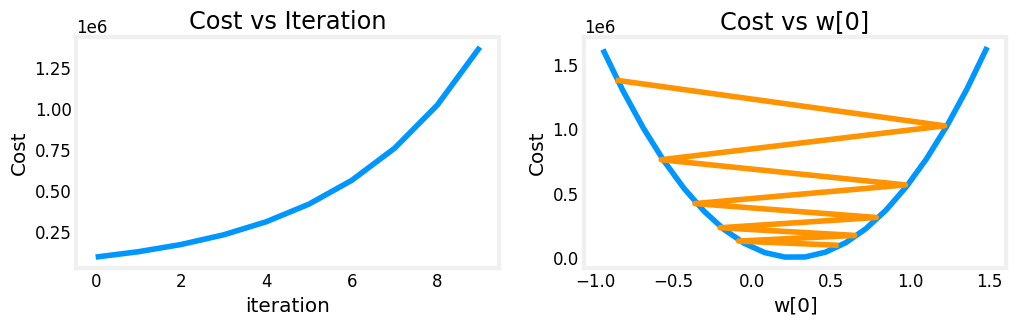

𝛼 = 9e-7

In [ ]:
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)
plot_cost_i_w(X_train, y_train, hist)

Cost is decreasing throughout the run showing that alpha is not too large.
So this should converge as iterate more.

Lets increse speed of descent and coverge in less time.

Choosing: 𝛼 = 1e-7



In [ ]:
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)
plot_cost_i_w(X_train, y_train, hist)

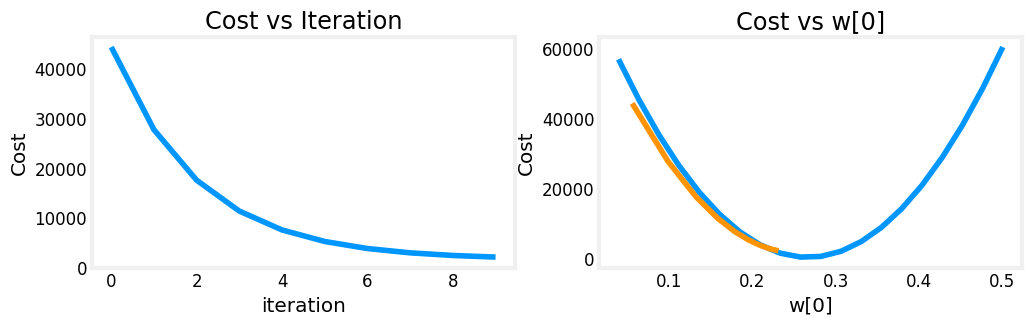

Thus, seems like lower values of alpha is coverging in less no of iterations(10 repeatations) for the given data.

Lest fix this value and proceed!

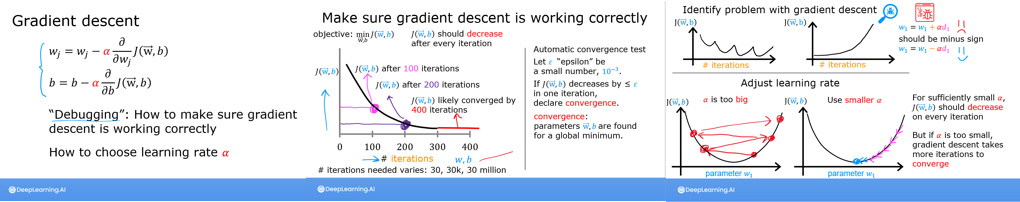

## Lets normalize the variables which are miles apart from one another.

Need for feature scaling:
1. For the given value of learning rate, some of the weights attain saturation/converges early while some features are still yet to attain their saturation.
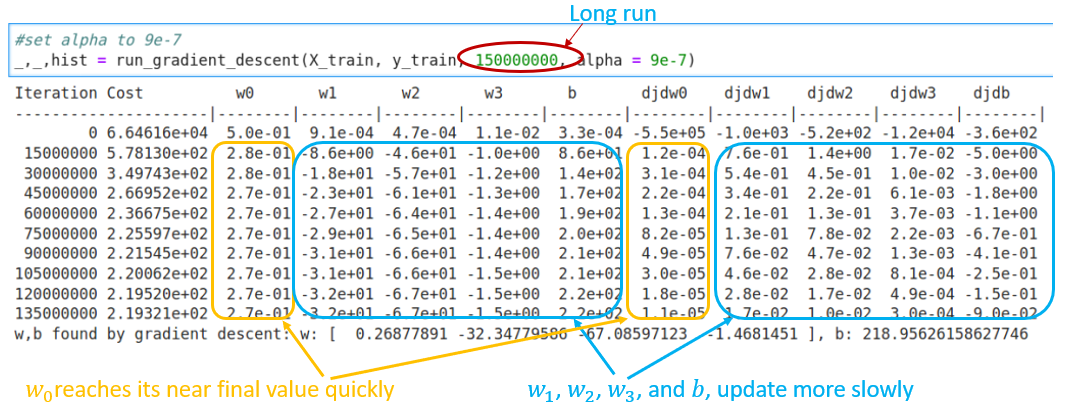

2. Need t run several iterations despite some/many have attained saturations but few/one is yet to attin . Causing overload.

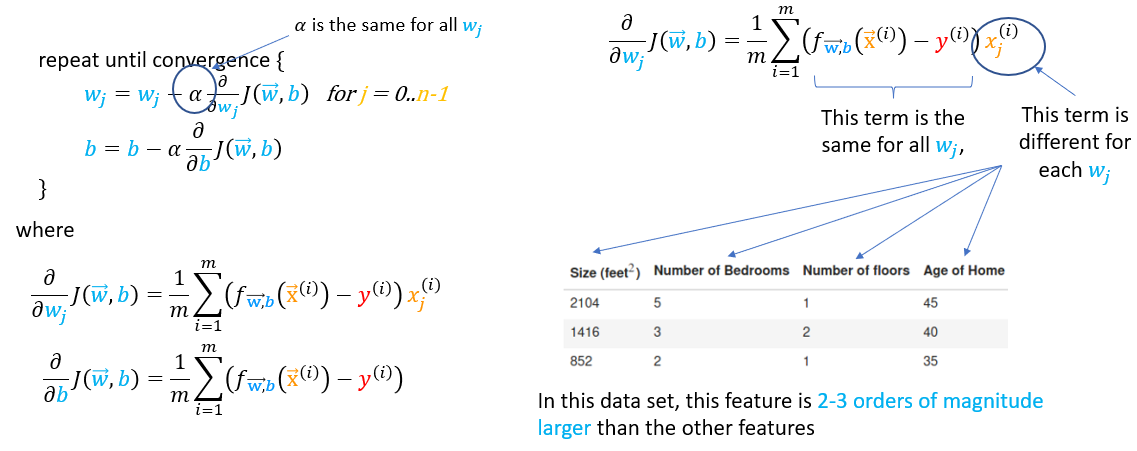



this happens coz features vary significantly in magnitude making some features update much faster than others. In this case,  𝑤0
  is multiplied by 'size(sqft)', which is generally > 1000, while  𝑤1
  is multiplied by 'number of bedrooms', which is generally 2-4.


The solution is to normalize every feature bvy their standrad deviation, need for Feature Scaling.

Types of feature scaling:
1. Max avg.
2. Mean Normalization..
3. Z-score Normalization: all features will have a mean of 0 and a standard deviation of 1.

Lets plot normalized vs atual training data features to see variations of scale down/up.

In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()


# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")

plt.show()

Couple observation post normalizing features:
1. The normalized data groups along 0 with +- units of deviation.
2. The peak diffrence is in quantifiable values as compared to thousands of diff in not-norm features.
3. all the features shows their varaition similiar and group along similiar x axis.

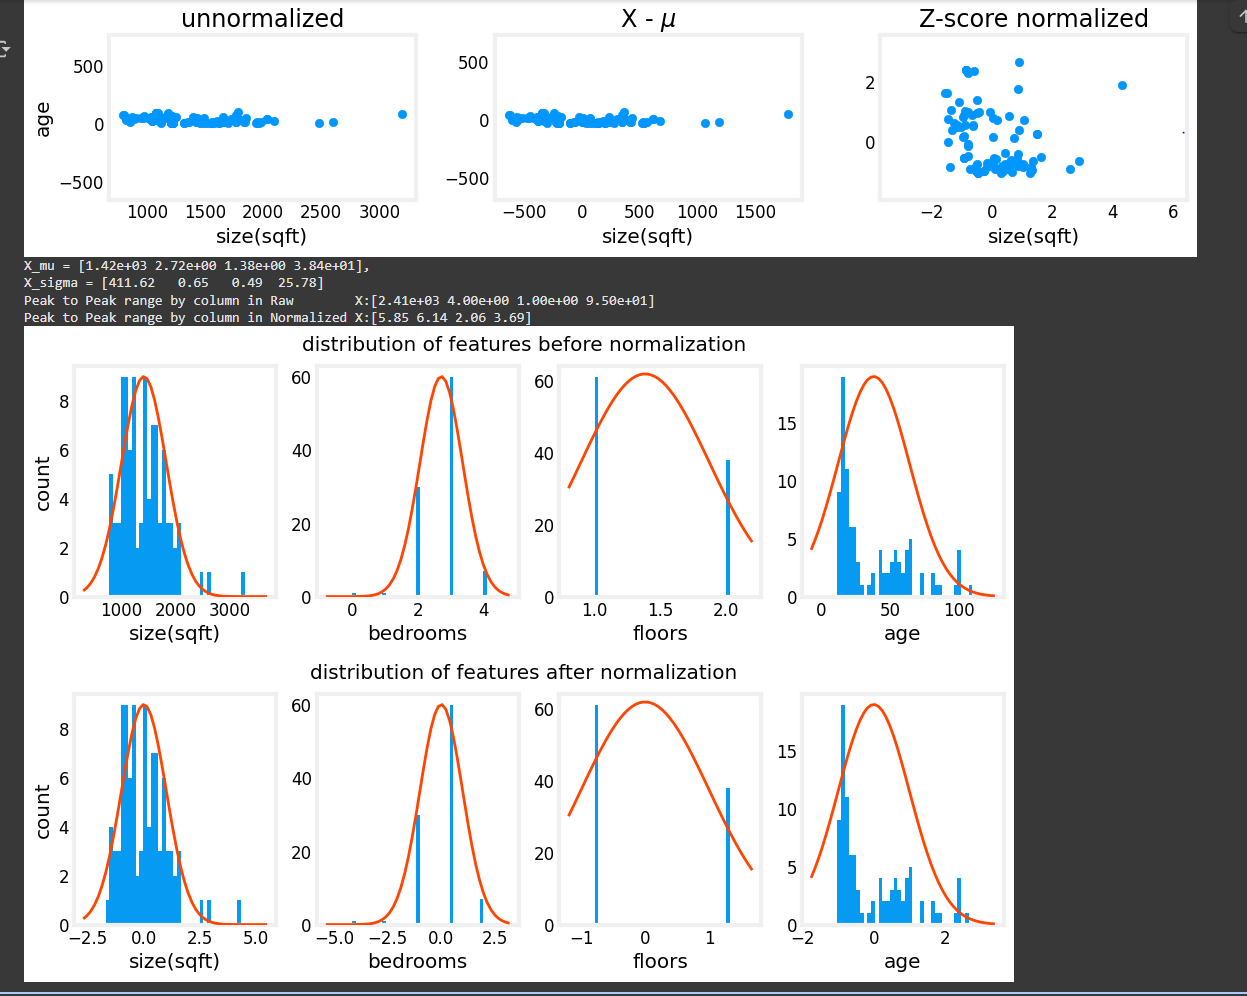

**Thus now performing descent on the normalized features will result in group/simultaneous descent in all the variables, coz they are numerically/stat wise have similiar variable quanaties, not extremly high/low diffrence.**

They are normalized to look same and be in same class

Thus, lets simulatneusly descent!

The iterations should be considerbaly small

In [ ]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

We got


> w,b found by gradient descent: w: [110.56 -21.27 -32.71 -37.97], b: 363.16

way faster with normalized features with even small value of alpha.



# Lets summarize and compare plots.

Summarize:
1. alpha, learning rate: for the given training data, determines how fast we descent/converge.
2. Scaling features: brings them to similiar levels of varaitions (othrwise peaks/poles apart with other features), which will help to descent all features together, thus doing it in less no of iterations.

With below values of weights and bias for the normalized features and alpha as low as 0.1,

> w,b found by gradient descent: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


lets compare true and predited plots for all the features.

In [ ]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

Good prediction with minimum squred error/cost.

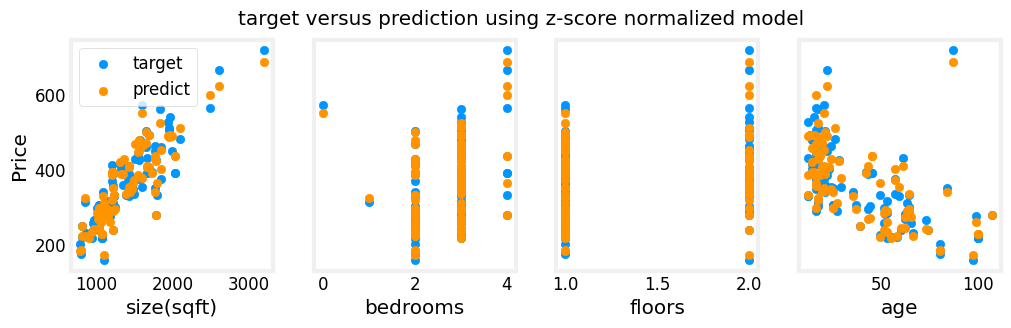

# One final prediction!

So lets solve for the values we started of with:

Problem:
> We need a linear regression model using these taining values that can then predict the price for other houses a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

Solution:
**Multi Variate Linear Reggresion** with

Weights and bias obtained from data:
> w,b found by gradient descent: w: [110.56 -21.27 -32.71 -37.97], b: 363.16

Low leanring rate alpha:
> 𝛼 = 0.1

Normalized input features:
> [-0.53  0.43 -0.79  0.06]

In [ ]:
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

### **Moment of truth!**




> predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709